# Udacity Data Science Nano Degree - Project 1

Dataset - Titanic Disaster -> https://github.com/datasciencedojo/datasets/blob/master/titanic.csv  
Name - Gaspar Mutimucuio


# Dataset background & Key Questions

The Titanic dataset is one of the most well-known datasets in the data science community. It contains detailed information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in April 1912.  
Please note that the dataset we are going to use only contains 891 records (Passengers). 

**History**
The RMS Titanic was a British passenger liner that struck an iceberg and sank in the North Atlantic Ocean on April 15, 1912. The disaster resulted in the deaths of more than 1,500 passengers and crew, making it one of the deadliest maritime disasters in history. The dataset was created to analyze the factors that influenced the survival of passengers.

**Questions I would like to answer**
1. What factors influenced survival?
2. What where the characteristics of those who did not survive?
3. Are there any correlations between ticket fares and survival?

# Load Libraries, Exploratory Data Analysis and Predictive Modelling

In [1]:
# Load Libraries and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set visualization style
sns.set_style('whitegrid')

df = pd.read_csv('titanic.csv')

In [2]:
## Data Exploration
def explore_data(df):
    """
    Perform initial exploration of the dataset.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to explore.
    
    Returns:
    None
    """
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset info:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())

# Explore the data
explore_data(df)

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [3]:
## Data Cleaning & Wrangling
def clean_data(df):
    """
    Clean the Titanic dataset by handling missing values and encoding categorical variables.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to clean.
    
    Returns:
    pd.DataFrame: Cleaned DataFrame.
    """
    # Handling missing values
    
    # 'Age' has some missing values, but since age is an important feature for survival prediction,
    # we replace missing values with the median age to prevent biasing the dataset.
    df['Age'].fillna(df['Age'].median(), inplace=True)
    
    # 'Embarked' has a few missing values. Since 'Embarked' is categorical, we replace missing values
    # with the most common value (mode), ensuring minimal impact on the dataset.
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # 'Cabin' has too many missing values (~77% of the dataset). Since imputing so many values could introduce noise,
    # we drop the column altogether.
    df.drop(columns=['Cabin'], inplace=True)
    
    # Encoding categorical variables
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # One-hot encoding 'Embarked' (categorical feature) while dropping one column to avoid multicollinearity.
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    
    return df

# Clean the data
df = clean_data(df)

C:\Users\mutig001\AppData\Local\Temp\ipykernel_30736\2246862887.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mutig001\AppData\Local\Temp\ipykernel_30736\2246862887.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [4]:
## Feature Engineering
def engineer_features(df):
    """
    Create new features to enhance the predictive power of the model.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to engineer features on.
    
    Returns:
    pd.DataFrame: DataFrame with new features.
    """
    # Creating 'FamilySize' feature: 
    # The number of family members (SibSp + Parch) is a strong indicator of survival chances.
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # Creating 'IsAlone' feature:
    # Passengers traveling alone had lower survival chances, so we introduce this feature.
    df['IsAlone'] = 1  # Initialize to 1 (true)
    df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # Set to 0 if traveling with family
    
    return df

# Engineer features
df = engineer_features(df)

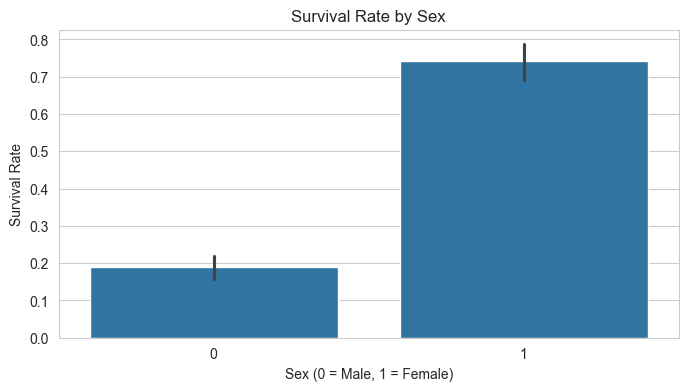

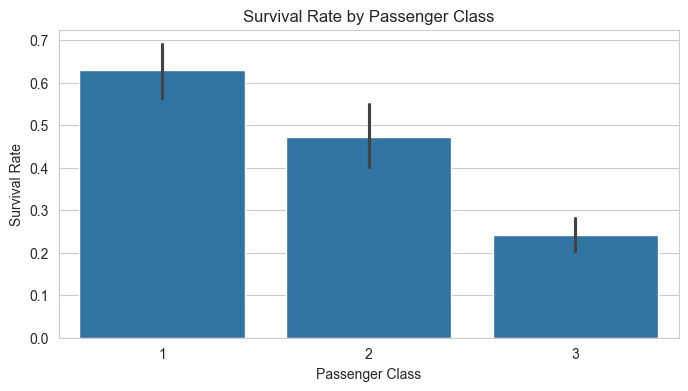

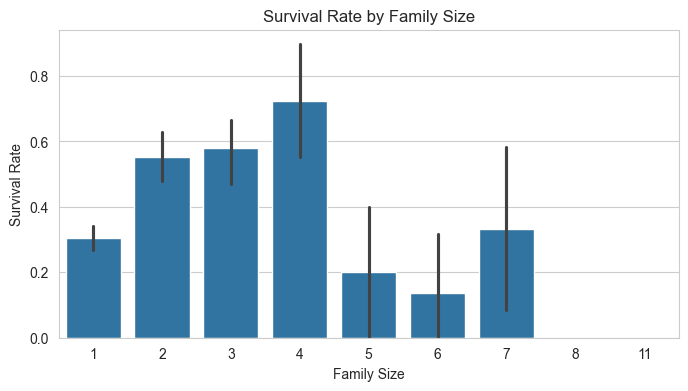

In [5]:
## Data Visualization
def visualize_data(df):
    """
    Visualize the distribution of key features and their relationship with survival.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to visualize.
    
    Returns:
    None
    """
    # Survival rate by sex
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Sex', y='Survived', data=df)
    plt.title('Survival Rate by Sex')
    plt.xlabel('Sex (0 = Male, 1 = Female)')
    plt.ylabel('Survival Rate')
    plt.show()
    
    # Survival rate by Pclass
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Pclass', y='Survived', data=df)
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.show()
    
    # Survival rate by FamilySize
    plt.figure(figsize=(8, 4))
    sns.barplot(x='FamilySize', y='Survived', data=df)
    plt.title('Survival Rate by Family Size')
    plt.xlabel('Family Size')
    plt.ylabel('Survival Rate')
    plt.show()

# Visualize the data
visualize_data(df)

In [6]:
## Model Building
def build_model(df):
    """
    Build and evaluate a logistic regression model to predict survival.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target variable.
    
    Returns:
    None
    """
    # Selecting features and target variable
    features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
    X = df[features]
    y = df['Survived']
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Building the model using logistic regression
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Evaluating the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Conclusions

* Women had a much higher survival rate than men

* First-class passengers had the highest survival rate

* Large families and solo travelers had lower survival rates

* The embarkation port had some effect, with Cherbourg passengers surviving more

* random Forest was the best predictive model